<a href="https://colab.research.google.com/github/21p31a04g5/Machine_Learning/blob/main/Spam_Emails_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df.size

11144

In [7]:
df.shape

(5572, 2)

<Axes: xlabel='count', ylabel='Category'>

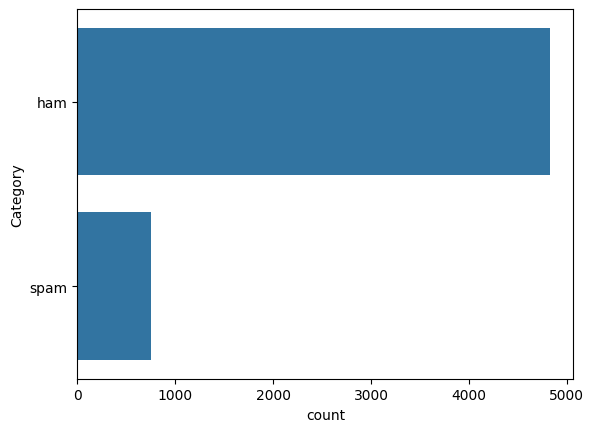

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.Category)

In [14]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [36]:
len(x_train)

4457

In [37]:
len(x_test)

1115

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [43]:
emails = [
    'Hello',
    "we have an amazing offer for you",
    'I want to meet in you in office tomorrow',
    '100% discount on next buy',
    "A reward waiting for you. Don't miss it",
    'sjhdfgviuwpuifnvijsrsnrgp9'
    'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. '

]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 0, 0, 1, 0, 1])

In [45]:
x_test_counts = v.transform(x_test)
model.score(x_test_counts,y_test)

0.9811659192825112

**PipeLine() Method**

In [57]:
from sklearn.pipeline import Pipeline
pl = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [58]:
pl.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [60]:
pl.predict(emails)

array([0, 0, 0, 1, 0, 1])

In [61]:
pl.score(x_test,y_test)

0.9811659192825112